### Feature Extraction

In this notebook, we'll work with the [CSE-CIC-IDS2018 dataset](https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv) from Kaggle. To access it from Colab, we need an API token that can be downloaded in https://www.kaggle.com/me/account => API => Create New API Token. A JSON file will be downloaded, and it must be uploaded to the Colab notebook.

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

Once the dataset link is ```https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv```, to download it we must use the following command:

In [6]:
!kaggle datasets download solarmainframe/ids-intrusion-csv

100% 1.59G/1.60G [00:40<00:00, 53.8MB/s]
100% 1.60G/1.60G [00:40<00:00, 42.8MB/s]


In [7]:
!unzip ids-intrusion-csv.zip -d IDS_Intrusion_2018

Archive:  ids-intrusion-csv.zip
  inflating: IDS_Intrusion_2018/02-14-2018.csv  
  inflating: IDS_Intrusion_2018/02-15-2018.csv  
  inflating: IDS_Intrusion_2018/02-16-2018.csv  
  inflating: IDS_Intrusion_2018/02-20-2018.csv  
  inflating: IDS_Intrusion_2018/02-21-2018.csv  
  inflating: IDS_Intrusion_2018/02-22-2018.csv  
  inflating: IDS_Intrusion_2018/02-23-2018.csv  
  inflating: IDS_Intrusion_2018/02-28-2018.csv  
  inflating: IDS_Intrusion_2018/03-01-2018.csv  
  inflating: IDS_Intrusion_2018/03-02-2018.csv  


We'll merge some of the CSV files to create one dataset. Some files will not be used in the merging: ```02-20-2018.csv``` has a different numnber of columns (84 columns, while the other files have 80 columns); ```02-22-2018.csv``` and ```02-23-2018.csv``` have only harmless traffic information, the most common type of traffic. Therefore, these last two will not add much more relevant information.

In [8]:
df_14_02 = pd.read_csv('IDS_Intrusion_2018/02-14-2018.csv')

In [9]:
df_15_02 = pd.read_csv('IDS_Intrusion_2018/02-15-2018.csv')

In some files, it will be necessary do some data cleaning, once they have columns with different data types.

If we try to convert these columns to numerical, we'll find that is impossible, because there are text data in them.

In [10]:
df_16_02 = pd.read_csv('IDS_Intrusion_2018/02-16-2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
for x in df_15_02.columns:
    df_16_02[x]=df_16_02[x].astype(df_15_02[x].dtypes.name)

ValueError: ignored

In [12]:
df_16_02.loc[df_16_02['Dst Port'] == 'Dst Port']

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
999999,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


Here we see in line 999999 that we have data that is inconsistent with the types that the columns should have. So that we can set the correct types to this column and work correctly with the dataset, we must eliminate this line:

In [13]:
df_16_02.drop(df_16_02.loc[df_16_02['Dst Port'] == 'Dst Port'].index, inplace=True)

In [14]:
for x in df_15_02.columns:
    df_16_02[x]=df_16_02[x].astype(df_15_02[x].dtypes.name)

In [16]:
df_21_02 = pd.read_csv('IDS_Intrusion_2018/02-21-2018.csv')

In [17]:
df_01_03 = pd.read_csv('IDS_Intrusion_2018/03-01-2018.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
for x in df_15_02.columns:
    df_01_03[x]=df_01_03[x].astype(df_15_02[x].dtypes.name)

ValueError: ignored

In [19]:
df_01_03.loc[df_01_03['Dst Port'] == 'Dst Port']

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
413,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
19761,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
19906,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
39019,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
60809,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
76528,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
81059,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
85448,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
89953,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
91404,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [20]:
df_01_03.drop(df_01_03.loc[df_01_03['Dst Port'] == 'Dst Port'].index, inplace=True)

In [21]:
for x in df_15_02.columns:
    df_01_03[x]=df_01_03[x].astype(df_15_02[x].dtypes.name)

In [22]:
df_02_03 = pd.read_csv('IDS_Intrusion_2018/03-02-2018.csv')

In [23]:
df = pd.concat([df_14_02,df_15_02,df_16_02,df_21_02,df_01_03,df_02_03],ignore_index=True)

These variables are very memory consumming. We can delete them.

Once memory is an important issue, we should also downcast the numerical types (int and float), saving a lot of memory too.

In [24]:
del df_14_02,df_15_02,df_16_02,df_21_02,df_01_03,df_02_03

In [25]:
def downcast_types(df):
  _start = df.memory_usage(deep=True).sum() / 1024 ** 2
  float_cols = [c for c in df if df[c].dtype == 'float64']
  int_cols = [c for c in df if df[c].dtype in ['int64','int32']]
  df[float_cols] = df[float_cols].astype(np.float32)
  df[int_cols] = df[int_cols].astype(np.int16)
  _end = df.memory_usage(deep=True).sum() / 1024 ** 2
  saved = (_start - _end) / _start * 100
  print(f"Saved {saved:.2f}%")
  return df

In [26]:
new_df = downcast_types(df)

Saved 51.42%


In [27]:
new_df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,-14665,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320860.0,139.300034,56320960.0,56320760.0,Benign
1,0,0,14/02/2018 08:33:50,-14918,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320732.0,114.551300,56320816.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,-17761,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319312.0,301.934601,56319524.0,56319096.0,Benign
3,22,6,14/02/2018 08:40:13,31438,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,22242,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573974 entries, 0 to 5573973
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int16  
 1   Protocol           int16  
 2   Timestamp          object 
 3   Flow Duration      int16  
 4   Tot Fwd Pkts       int16  
 5   Tot Bwd Pkts       int16  
 6   TotLen Fwd Pkts    int16  
 7   TotLen Bwd Pkts    float32
 8   Fwd Pkt Len Max    int16  
 9   Fwd Pkt Len Min    int16  
 10  Fwd Pkt Len Mean   float32
 11  Fwd Pkt Len Std    float32
 12  Bwd Pkt Len Max    int16  
 13  Bwd Pkt Len Min    int16  
 14  Bwd Pkt Len Mean   float32
 15  Bwd Pkt Len Std    float32
 16  Flow Byts/s        float32
 17  Flow Pkts/s        float32
 18  Flow IAT Mean      float32
 19  Flow IAT Std       float32
 20  Flow IAT Max       float32
 21  Flow IAT Min       float32
 22  Fwd IAT Tot        float32
 23  Fwd IAT Mean       float32
 24  Fwd IAT Std        float32
 25  Fwd IAT Max       

Converting the datetime ```Timestamp``` column to UNIX datetime:

In [29]:
new_df['Timestamp'] = new_df['Timestamp'].apply(lambda x: pd.Timestamp(x).timestamp())

In [30]:
new_df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,1.518597e+09,-14665,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320860.0,139.300034,56320960.0,56320760.0,Benign
1,0,0,1.518597e+09,-14918,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320732.0,114.551300,56320816.0,56320652.0,Benign
2,0,0,1.518597e+09,-17761,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319312.0,301.934601,56319524.0,56319096.0,Benign
3,22,6,1.518598e+09,31438,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,1.518598e+09,22242,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


Doing this transformation can be important, if using the dataset in machine learning/deep learning models.

Let's also delete the previous dataset from memory.

In [31]:
del df

To use our data in any machine learning/deep learning model, we have to encode our labels: they are in text format, and must be converted to numerical:

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_df['Label'] = encoder.fit_transform(new_df['Label'])

In [33]:
encoder.classes_

array(['Benign', 'Bot', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DoS attacks-GoldenEye', 'DoS attacks-Hulk',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris',
       'FTP-BruteForce', 'Infilteration', 'SSH-Bruteforce'], dtype=object)

In [35]:
new_df.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,...,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06,5.573974e+06
mean,-2.084439e+03,7.662439e+00,1.518354e+09,2.217170e+03,4.012744e+00,4.630055e+00,3.772289e+02,3.004142e+03,2.552708e+02,6.775956e+00,...,2.172394e+01,7.260694e+04,3.290744e+04,1.133390e+05,5.182829e+04,2.765339e+06,2.265278e+05,3.175227e+06,2.496782e+06,1.671268e+00
std,7.456711e+03,4.057101e+00,1.724365e+06,1.368045e+04,2.894687e+02,9.093787e+01,8.445573e+02,1.697959e+05,3.573176e+02,2.023734e+01,...,8.854947e+00,1.287772e+06,7.434178e+05,1.694269e+06,1.105397e+06,2.348163e+08,1.656844e+08,6.601706e+08,1.324434e+07,2.807535e+00
min,-3.276800e+04,0.000000e+00,1.037888e+07,-3.276800e+04,-3.274800e+04,-3.217000e+04,-3.276800e+04,0.000000e+00,-3.260000e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100000e+01,6.000000e+00,1.518571e+09,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,1.518671e+09,9.080000e+02,2.000000e+00,1.000000e+00,4.200000e+01,7.900000e+01,3.900000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,6.000000e+00,1.518746e+09,9.936000e+03,5.000000e+00,4.000000e+00,9.350000e+02,3.490000e+02,5.020000e+02,0.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,3.276600e+04,1.700000e+01,1.519210e+09,3.276700e+04,3.266200e+04,3.126200e+04,3.271400e+04,1.010000e+08,2.577600e+04,1.460000e+03,...,5.600000e+01,1.140000e+08,7.490000e+07,1.140000e+08,1.140000e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10,1.000000e+01


Now, let's train a Random Forest with our data:

In [36]:
X = new_df.iloc[:, 0:79].values #predictive attributes
y = new_df.iloc[:, 79].values #attribute to be predicted

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)

In [38]:
rf.fit(X, y)

ValueError: ignored

In [40]:
count_inf = np.isinf(new_df).values.sum()
print(count_inf)

26050


In [45]:
count_na = new_df.isna().sum().sum()
print(count_na)

11590


In [46]:
print(count_inf + count_na)

37640


We have a total of 37640 rows with infinity or nan values. It's impossible for the model to work with such data. Let's remove them. First of all, we'll replace the infinity values with nan values:

In [47]:
new_df = new_df.replace([np.inf, -np.inf], np.nan)

Let's see which columns have nan values:

In [48]:
new_df[new_df.columns[new_df.isna().any()]]

,Flow Byts/s,Flow Pkts/s
0,0.000000,0.026633
1,0.000000,0.026633
2,0.000000,0.026634
3,544.161499,3.873587
4,380.733185,2.839597
...,...,...
5573969,796.799133,5.524608
5573970,833.965393,5.785947
5573971,796.655762,5.494177
5573972,797.812134,5.502153


We'll replace every nan value with the 0.98th quantile of the column data:

In [49]:
#https://stackoverflow.com/a/70333406

value = new_df['Flow Byts/s'].quantile(0.98)
new_df['Flow Byts/s'].replace(np.nan, value, inplace=True)

In [50]:
value = new_df['Flow Pkts/s'].quantile(0.98)
new_df['Flow Pkts/s'].replace(np.nan, value, inplace=True)

In [51]:
X = new_df.iloc[:, 0:79].values
y = new_df.iloc[:, 79].values

In [52]:
X.shape

(5573974, 79)

In [53]:
y.shape

(5573974,)

In [54]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)

In [55]:
rf.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

Let's use this Random Forest to do feature extraction (i.e.: keep only the most important attributes of the dataset). This task is especially important in our dataset, as it has 80 predictor attributes:

In [56]:
feature_names = new_df.iloc[:, 0:79].columns

In [57]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

In [58]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (36,18)

Feature importances:  [4.55718299e-02 1.10194708e-03 1.39663538e-01 1.81269574e-02
 7.26802399e-03 1.13732423e-02 2.05248150e-02 7.91148970e-03
 7.49732723e-03 1.90273875e-04 1.30382172e-02 2.71608293e-03
 1.24830753e-02 8.93696552e-05 1.63078593e-02 9.45760227e-03
 2.28980534e-02 2.71111569e-02 2.17108118e-02 4.83657294e-03
 2.46278878e-02 2.09840458e-02 2.16471758e-02 1.84131426e-02
 2.29432474e-03 2.27495941e-02 2.44864041e-02 2.22438761e-03
 1.03851427e-03 2.93849552e-03 1.95520775e-03 1.12288928e-03
 8.05347504e-05 0.00000000e+00 4.69659364e-05 0.00000000e+00
 4.40984528e-02 1.74961059e-02 2.30981037e-02 1.91810790e-02
 1.17009346e-04 1.83139640e-02 1.71299380e-02 9.20536349e-03
 7.09225485e-03 1.31141169e-04 1.06977642e-04 3.48050052e-03
 1.48027149e-02 8.60741381e-03 4.23939996e-03 3.84854924e-05
 5.04564903e-03 4.86289241e-03 6.58005393e-03 1.20969763e-02
 1.19416164e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.80829904e-03
 1

Text(0.5, 1.0, 'Visualizing Important Features')

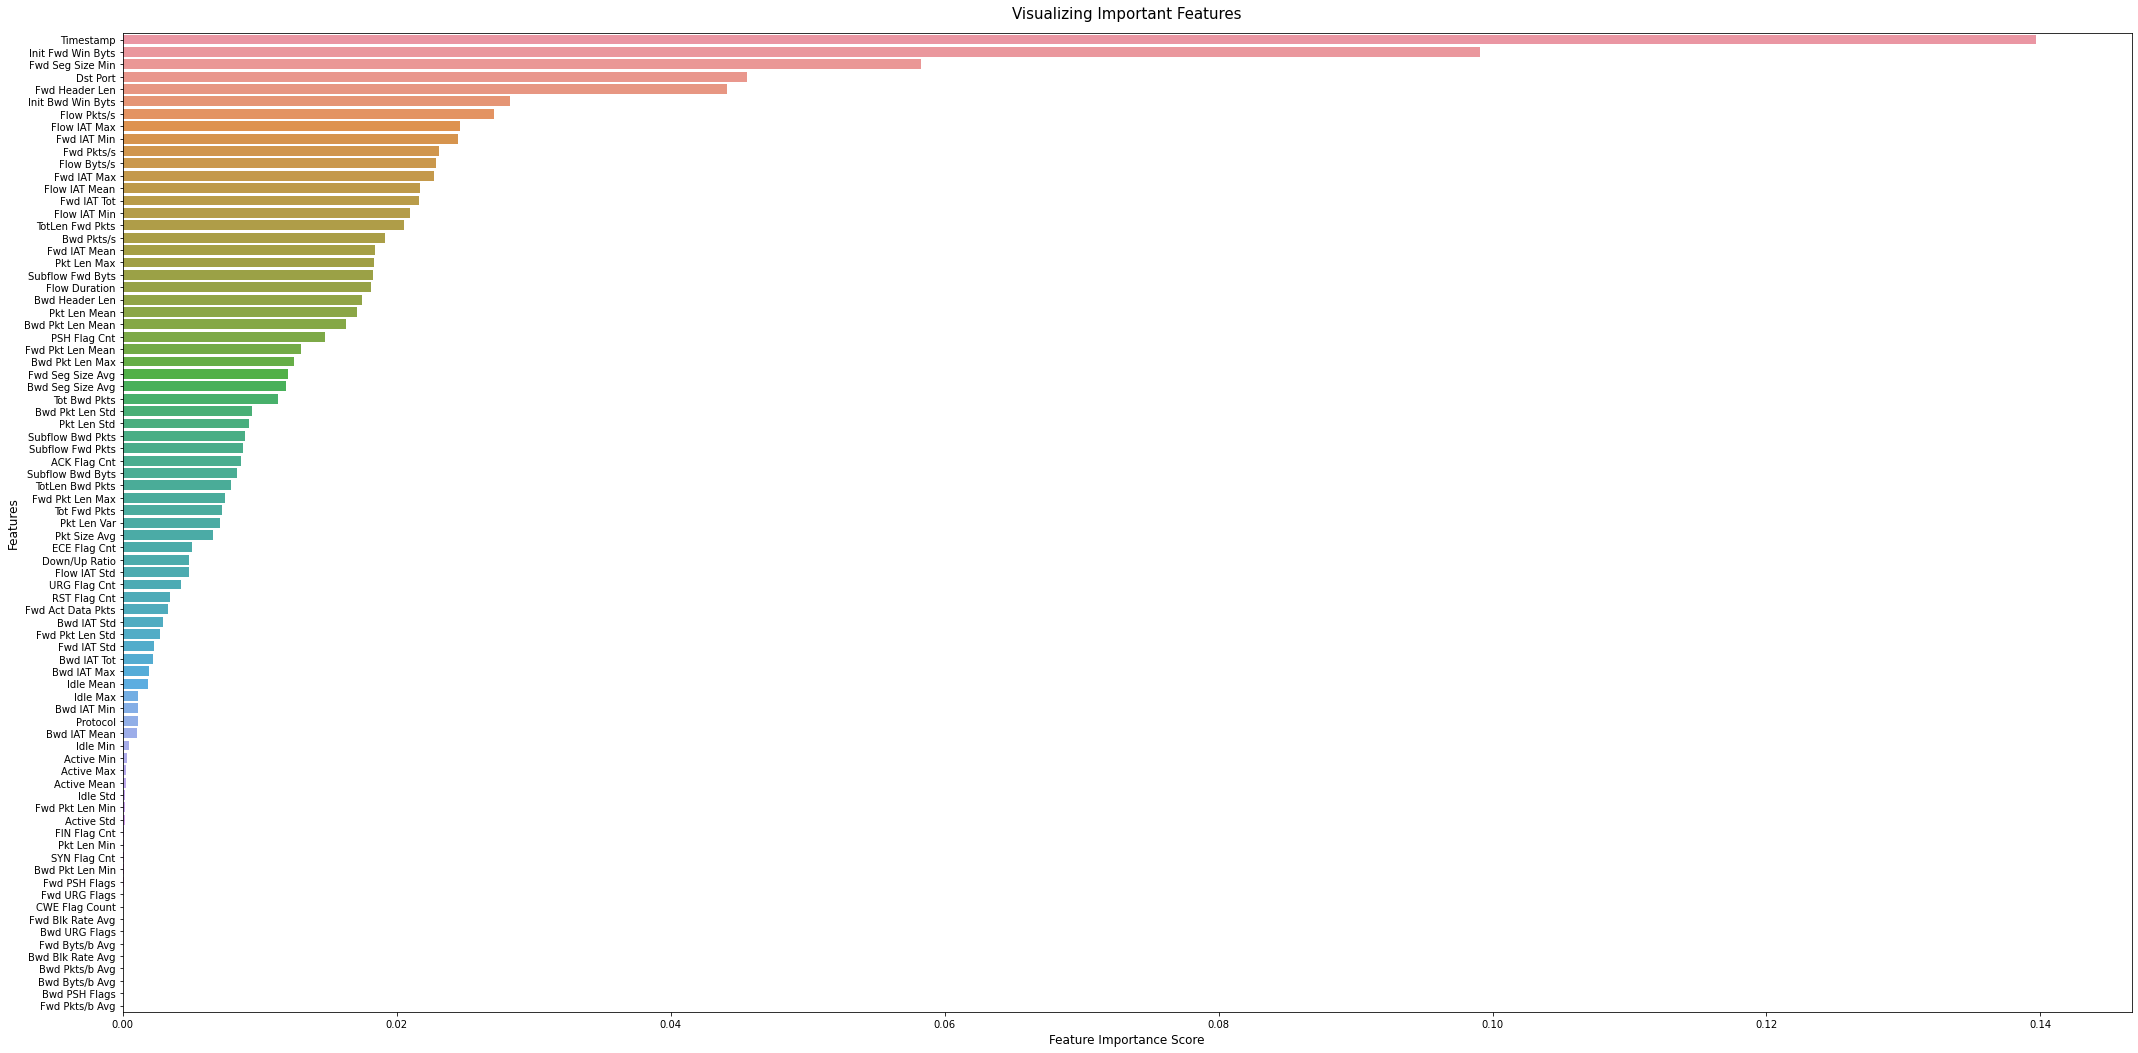

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

print('Feature importances: ', rf.feature_importances_)
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In the figure above, we see the attributes ordered in order from most important to least important.

Let's keep in our dataset only those that are at least 1.75% important:

In [60]:
new_classes = (feature_imp.values > 0.0175)

In [61]:
new_classes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

22 attributes in total. Let's see what they are:

In [62]:
feature_imp.index[0:22]

Index(['Timestamp', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port',
       'Fwd Header Len', 'Init Bwd Win Byts', 'Flow Pkts/s', 'Flow IAT Max',
       'Fwd IAT Min', 'Fwd Pkts/s', 'Flow Byts/s', 'Fwd IAT Max',
       'Flow IAT Mean', 'Fwd IAT Tot', 'Flow IAT Min', 'TotLen Fwd Pkts',
       'Bwd Pkts/s', 'Fwd IAT Mean', 'Pkt Len Max', 'Subflow Fwd Byts',
       'Flow Duration', 'Bwd Header Len'],
      dtype='object')

Let's make our dataset consist of just these 22 attributes, plus the attribute we want to predict:

In [63]:
new_df = new_df[['Timestamp', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port',
       'Fwd Header Len', 'Init Bwd Win Byts', 'Flow Pkts/s', 'Flow IAT Max',
       'Fwd IAT Min', 'Fwd Pkts/s', 'Flow Byts/s', 'Fwd IAT Max',
       'Flow IAT Mean', 'Fwd IAT Tot', 'Flow IAT Min', 'TotLen Fwd Pkts',
       'Bwd Pkts/s', 'Fwd IAT Mean', 'Pkt Len Max', 'Subflow Fwd Byts',
       'Flow Duration', 'Bwd Header Len','Label']]

new_df.head()

,Timestamp,Init Fwd Win Byts,Fwd Seg Size Min,Dst Port,Fwd Header Len,Init Bwd Win Byts,Flow Pkts/s,Flow IAT Max,Fwd IAT Min,Fwd Pkts/s,...,Fwd IAT Tot,Flow IAT Min,TotLen Fwd Pkts,Bwd Pkts/s,Fwd IAT Mean,Pkt Len Max,Subflow Fwd Byts,Flow Duration,Bwd Header Len,Label
0,1.518597e+09,-1,0,0,0,-1,0.026633,56320960.0,56320760.0,0.026633,...,112641720.0,56320760.0,0,0.000000,5.632086e+07,0,0,-14665,0,0
1,1.518597e+09,-1,0,0,0,-1,0.026633,56320816.0,56320652.0,0.026633,...,112641464.0,56320652.0,0,0.000000,5.632073e+07,0,0,-14918,0,0
2,1.518597e+09,-1,0,0,0,-1,0.026634,56319524.0,56319096.0,0.026634,...,112638624.0,56319096.0,0,0.000000,5.631931e+07,0,0,-17761,0,0
3,1.518598e+09,-1,32,22,488,233,3.873587,673900.0,229740.0,2.324152,...,6453966.0,22.0,1239,1.549435,4.609976e+05,976,1239,31438,328,0
4,1.518598e+09,5808,32,22,456,233,2.839597,1928102.0,246924.0,1.590174,...,8804066.0,21.0,1143,1.249423,6.772359e+05,976,1143,22242,360,0


We can now use a dataset with a much smaller amount of predictor attributes to use in our machine/deep learning models. So that we can use it in the future, it is possible to save it:

In [64]:
new_df.to_csv('IDS_2018_Extracted_Features.csv')